## Importações e entrada de dados

In [1]:
# Adicionando importações
import pandas as pd
import seaborn as sns
sns.set_palette("flare")

In [2]:
dados_pre_2023 = pd.read_csv("arquivos/pre_2023.csv", sep=",", encoding="utf-8")

C:\Users\yago_\AppData\Local\Temp\ipykernel_5752\3855269712.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dados_pre_2023 = pd.read_csv("arquivos/pre_2023.csv", sep=",", encoding="utf-8")


In [3]:
# Juntando as tabelas de 2024
dados_p1 = pd.read_csv("arquivos/01-06-2024.csv", sep=",", encoding="utf-8")
dados_p2 = pd.read_csv("arquivos/07-09-2024.csv", sep=",", encoding="utf-8")
dados_p3 = pd.read_csv("arquivos/10-12-2024.csv", sep=",", encoding="utf-8")
dados_2024 = pd.concat([dados_p1, dados_p2, dados_p3])

## Análise inicial dos dados 

In [4]:
dados_2024.value_counts(subset=dados_2024.mes, sort=False)

mes
1      152585
2      156857
3      118873
4       49823
5      152051
6      353043
7      504172
8     2263187
9     2568158
10    1007697
11     588262
12     234136
Name: count, dtype: int64

In [5]:
dados_2024 = dados_2024.dropna(subset="bioma")
dados_2024.isnull().sum()

ano                             0
mes                             0
data_hora                       0
bioma                           0
sigla_uf                        0
sigla_uf_nome                   0
id_municipio                    0
id_municipio_nome               0
latitude                        0
longitude                       0
satelite                        0
dias_sem_chuva             112283
precipitacao               112283
risco_fogo                 112283
potencia_radiativa_fogo    338730
dtype: int64

In [6]:
dados_pre_2023 = dados_pre_2023.dropna(subset="bioma")
analise_2023 = dados_pre_2023.isnull().sum()

## Análise geral dos dados brutos por ano e bioma
Os dados de 2003 até 2022 são bagunçados e poucos. A ideia é apresentar eles apenas como a noção de que existem e mostrar uma tendência (os biomas mais atingidos pelas queimadas são os mesmos em todos os anos), mas não se aprofundar na análise deles.

### 2003 - 2012

In [ ]:
intervalo_ano = range(2003, 2013)
gplot_03_12 = sns.displot(dados_pre_2023.loc[(dados_pre_2023["ano"] >= 2003) & (dados_pre_2023["ano"] <= 2012)], 
            x="ano",
            bins=intervalo_ano,
            legend=True,
            col="bioma",
            col_wrap=3
            )
gplot_03_12.add_legend()

### 2013 - 2022

In [ ]:
intervalo_ano = range(2013, 2023)
gplot_13_22 = sns.displot(dados_pre_2023.loc[(dados_pre_2023["ano"] >= 2013) & (dados_pre_2023["ano"] <= 2022)], 
            x="ano",
            bins=intervalo_ano,
            legend=True,
            col="bioma",
            col_wrap=3
            )
gplot_13_22.add_legend()

### 2023 - 2024

In [ ]:
gplot_2023 = sns.displot(dados_pre_2023.loc[(dados_pre_2023["ano"] == 2023)], 
            x="mes",
            legend=True,
            discrete=True,
            col="bioma",
            col_wrap=3
            )
gplot_2023.add_legend()

In [ ]:
gplot_2024 = sns.displot(dados_2024, 
            x="mes",
            legend=True,
            discrete=True,
            col="bioma",
            col_wrap=3
            )
gplot_2024.add_legend()

## Limpando e analisando dados
Aqui eu separo apenas os dados de 2023 e 2024, fazendo análise apenas dos que apresentam dados de:
- Dias sem chuva - *dias_sem_chuva*
- Precipitação (ml) - *precipitacao*
- Risco de Fogo - *risco_fogo*
- Potência Radiativa do Fogo (MW) - *potencia_radiativa_fogo*

### Removendo valores nulos

In [7]:
clean_2023 = dados_pre_2023.loc[dados_pre_2023.ano == 2023].dropna()
clean_2024 = dados_2024.dropna()

### Analisando outliers

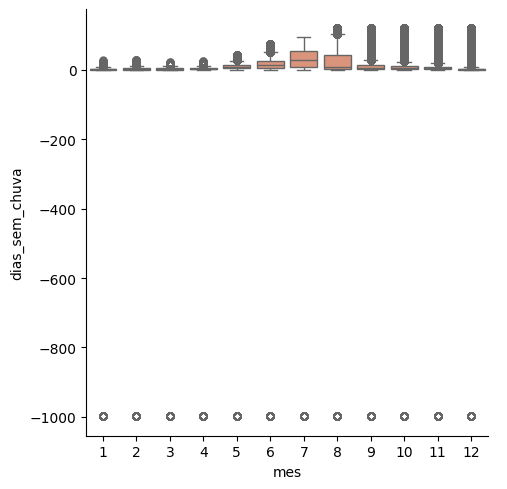

In [8]:
sns.catplot(clean_2023, x="mes", y="dias_sem_chuva", kind="box")

In [9]:
outliers_ls = (clean_2023.loc[(clean_2023["dias_sem_chuva"] < 0) | (clean_2023["precipitacao"] < 0)]).index.values
clean_2023 = clean_2023.drop(index=outliers_ls)
outliers_ls = (clean_2023.loc[(clean_2023["risco_fogo"] < 0) | (clean_2023["potencia_radiativa_fogo"] < 0)]).index.values
clean_2023 = clean_2023.drop(index=outliers_ls)
outliers_ls = (clean_2023.loc[(clean_2023["risco_fogo"] > 1) | (clean_2023["potencia_radiativa_fogo"] > 1500)]).index.values
clean_2023 = clean_2023.drop(index=outliers_ls)

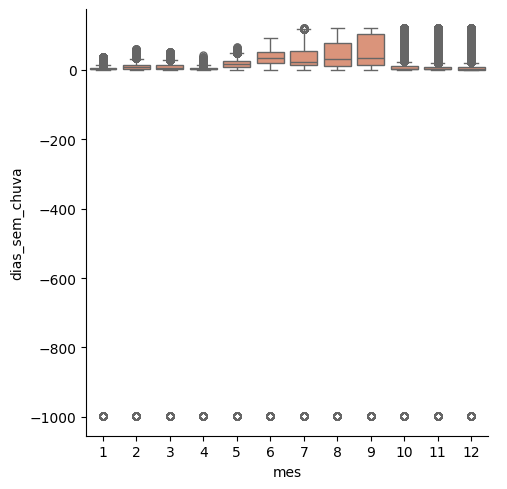

In [10]:
sns.catplot(clean_2024, x="mes", y="dias_sem_chuva", kind="box")

In [11]:
outliers_ls = (clean_2024.loc[(clean_2024["dias_sem_chuva"] < 0) | (clean_2024["precipitacao"] < 0)]).index.values
clean_2024 = clean_2024.drop(index=outliers_ls)
outliers_ls = (clean_2024.loc[(clean_2024["risco_fogo"] < 0) | (clean_2024["potencia_radiativa_fogo"] < 0)]).index.values
clean_2024 = clean_2024.drop(index=outliers_ls)
outliers_ls = (clean_2024.loc[(clean_2024["risco_fogo"] > 1) | (clean_2024["potencia_radiativa_fogo"] > 1500)]).index.values
clean_2024 = clean_2024.drop(index=outliers_ls)

### Analisando dados (2023)

#### Relação entre meses e número de queimadas por bioma

In [ ]:
clplot_2023 = sns.displot(clean_2023, 
            x="mes",
            legend=True,
            discrete=True,
            col="bioma",
            col_wrap=3
            )
clplot_2023.add_legend()

In [12]:
# Define um novo dataframe apenas com os dados do Cerrado e da Amazônia
biomas_2023 = clean_2023.loc[(clean_2023["bioma"].isin(["Cerrado", "Amazônia"]))]

#### Relação entre dias sem chuvas e mês considerando os dois biomas mais atingidos (Cerrado e Amazônia)

In [ ]:
heat_2023 = sns.displot(biomas_2023,
            x="mes",
            y="dias_sem_chuva",
            legend=True,
            discrete=True,
            col="bioma",
            )
heat_2023.add_legend()

#### Relação entre dias sem chuva e potência radiativa de fogo

In [ ]:
heat_2023 = sns.displot(biomas_2023,
            x="potencia_radiativa_fogo",
            y="dias_sem_chuva",
            legend=True,
            discrete=True,
            col="bioma",
            )

In [ ]:
sns.relplot(biomas_2023, x="precipitacao", y="potencia_radiativa_fogo")

In [ ]:
sns.displot(biomas_2023,
            x="mes",
            hue="potencia_radiativa_fogo",
            legend=True,
            discrete=True,
            col="bioma",
            )

### Analisando dados (2024)

#### Relação entre meses e número de queimadas por bioma

In [ ]:
clplot_2024 = sns.displot(clean_2024, 
            x="mes",
            legend=True,
            discrete=True,
            col="bioma",
            col_wrap=3
            )

In [ ]:
# Define um novo dataframe apenas com os dados do Cerrado e da Amazônia
biomas_2024 = clean_2024.loc[(clean_2024["bioma"].isin(["Cerrado", "Amazônia"]))]

#### Relação entre dias sem chuvas e mês considerando os dois biomas mais atingidos (Cerrado e Amazônia)

In [ ]:
mes_2024 = sns.displot(biomas_2024,
            x="mes",
            y="dias_sem_chuva",
            legend=True,
            discrete=True,
            col="bioma",
            )
mes_2024.add_legend()

#### Relação entre dias sem chuva e potência radiativa de fogo

In [ ]:
heat_2023 = sns.displot(biomas_2024,
            x="potencia_radiativa_fogo",
            y="dias_sem_chuva",
            legend=True,
            discrete=True,
            col="bioma",
            )

In [ ]:
sns.relplot(biomas_2024, x="precipitacao", y="potencia_radiativa_fogo")

In [ ]:
sns.displot(biomas_2024,
            x="mes",
            hue="potencia_radiativa_fogo",
            legend=True,
            discrete=True,
            col="bioma",
            )